## Wrangling Income reports by zipcode in Seattle 

### Goals of the Task



There is one table in the dataset retrieved from the Seattle open data portal for 2016 tax returns <br>
*each row is a zipcode and income band. There are 6 bands with ranges of income defined* <br>

- We want to use this data to estimate the average (weighted) income of people living in each zipcode. This may inform us if theres a connection between income levels in an area and cycle hire popularity / behaviour in that area. 
- we can also potentially use this data to work out how many working adults, non working adults and children, eldery people live in a zipcode. This could inform us how many potential cyclists live in each zipcode 

#### Step 1 : use pandas to read the csv file as a data frame 
- import pandas as pd 
- use pandas read_csv 
- ensure you are pointing at the correct file path for the data sources (you may have to navigate in your notebook!) 


In [1]:
import pandas as pd

In [2]:
income = pd.read_csv("WA_incomes_zip_code.csv")

In [6]:
income.head()

,Zip Code,Adjusted Gross Income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total prepared returns,Number of volunteer income tax assistance (VITA) prepared returns,Number of tax counseling for the elderly (TCE) prepared returns,Number of volunteer prepared \nreturns with\nEarned Income Credit,Number of refund anticipation loan returns,Number of refund anticipation check returns,Number of elderly returns [3],Adjusted gross income (AGI) [4],Number of returns.1,Total Income Amount
0,98001,"$1 under $25,000",4420,3280,530,560,1710,5590,1640,140,100,50,50,40,440,640,54567,4420,55475
1,98001,"$25,000 under $50,000",3750,2130,930,620,1570,6990,2350,90,70,30,0,0,580,610,137006,3750,138595
2,98001,"$50,000 under $75,000",2520,1010,1140,340,1160,5670,2000,30,0,30,0,0,270,570,156568,2520,158094
3,98001,"$75,000 under $100,000",1850,430,1250,140,840,4600,1500,0,0,0,0,0,170,470,160704,1850,162024
4,98001,"$100,000 under $200,000",2680,290,2270,120,1280,7320,2370,0,0,0,0,0,150,650,359959,2680,363321


#### Step 2: preview the dataframe using pandas functions like .info() .head(), .tail() and .describe() 
- look out for nulls and missing data 
- any problematic data types
- interpret the column headers to see which columns you want to keep 

In [7]:
income.columns=income.columns.str.lower()

In [9]:
income.head()

,zip code,adjusted gross income,number of returns,number of single returns,number of joint returns,number of head of household returns,number with paid preparer's signature,number of exemptions,number of dependents,total prepared returns,number of volunteer income tax assistance (vita) prepared returns,number of tax counseling for the elderly (tce) prepared returns,number of volunteer prepared \nreturns with\nearned income credit,number of refund anticipation loan returns,number of refund anticipation check returns,number of elderly returns [3],adjusted gross income (agi) [4],number of returns.1,total income amount
0,98001,"$1 under $25,000",4420,3280,530,560,1710,5590,1640,140,100,50,50,40,440,640,54567,4420,55475
1,98001,"$25,000 under $50,000",3750,2130,930,620,1570,6990,2350,90,70,30,0,0,580,610,137006,3750,138595
2,98001,"$50,000 under $75,000",2520,1010,1140,340,1160,5670,2000,30,0,30,0,0,270,570,156568,2520,158094
3,98001,"$75,000 under $100,000",1850,430,1250,140,840,4600,1500,0,0,0,0,0,170,470,160704,1850,162024
4,98001,"$100,000 under $200,000",2680,290,2270,120,1280,7320,2370,0,0,0,0,0,150,650,359959,2680,363321


In [13]:
sel_cols = ['zip code', 'adjusted gross income', 'adjusted gross income (agi) [4]', 'number of returns', 
            'number of dependents', 'number of elderly returns [3]']
income2=income[sel_cols]

In [26]:
income2.head(20)

,zip code,adjusted gross income,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3]
0,98001,"$1 under $25,000",54567,4420,1640,640
1,98001,"$25,000 under $50,000",137006,3750,2350,610
2,98001,"$50,000 under $75,000",156568,2520,2000,570
3,98001,"$75,000 under $100,000",160704,1850,1500,470
4,98001,"$100,000 under $200,000",359959,2680,2370,650
5,98001,"$200,000 or more",179968,540,520,160
6,98002,"$1 under $25,000",73987,5590,3250,930
7,98002,"$25,000 under $50,000",186790,5140,4770,790
8,98002,"$50,000 under $75,000",149111,2440,2150,520
9,98002,"$75,000 under $100,000",109919,1280,1210,320


#### Step 3: drop unneccessary columns
- change all column headers to lower case 
- use any pandas method to select a subset of columns to a new dataframe 
- retain zipcode, adjusted gross income, number of returns, number of dependants, number of elderly returns 

In [16]:
import numpy as np

In [22]:
income2.head(6)

,zip code,adjusted gross income,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3]
0,98001,"$1 under $25,000",54567,4420,1640,640
1,98001,"$25,000 under $50,000",137006,3750,2350,610
2,98001,"$50,000 under $75,000",156568,2520,2000,570
3,98001,"$75,000 under $100,000",160704,1850,1500,470
4,98001,"$100,000 under $200,000",359959,2680,2370,650
5,98001,"$200,000 or more",179968,540,520,160


In [24]:
print (income2)

      zip code    adjusted gross income  adjusted gross income (agi) [4]  \
0        98001         $1 under $25,000                            54567   
1        98001    $25,000 under $50,000                           137006   
2        98001    $50,000 under $75,000                           156568   
3        98001   $75,000 under $100,000                           160704   
4        98001  $100,000 under $200,000                           359959   
...        ...                      ...                              ...   
2971     99999    $25,000 under $50,000                           532147   
2972     99999    $50,000 under $75,000                           561159   
2973     99999   $75,000 under $100,000                           501512   
2974     99999  $100,000 under $200,000                          1052792   
2975     99999         $200,000 or more                          1665460   

      number of returns  number of dependents  number of elderly returns [3]  
0       

In [39]:
income2['midpoint']=income2['adjusted gross income']

C:\Users\Admin\AppData\Local\Temp\ipykernel_5428\433851831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income2['midpoint']=income2['adjusted gross income']


In [40]:
income2

,zip code,adjusted gross income,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3],midpoint
0,98001,"$1 under $25,000",54567,4420,1640,640,"$1 under $25,000"
1,98001,"$25,000 under $50,000",137006,3750,2350,610,"$25,000 under $50,000"
2,98001,"$50,000 under $75,000",156568,2520,2000,570,"$50,000 under $75,000"
3,98001,"$75,000 under $100,000",160704,1850,1500,470,"$75,000 under $100,000"
4,98001,"$100,000 under $200,000",359959,2680,2370,650,"$100,000 under $200,000"
...,...,...,...,...,...,...,...
2971,99999,"$25,000 under $50,000",532147,14600,8850,4160,"$25,000 under $50,000"
2972,99999,"$50,000 under $75,000",561159,9120,5020,3330,"$50,000 under $75,000"
2973,99999,"$75,000 under $100,000",501512,5800,3080,2290,"$75,000 under $100,000"
2974,99999,"$100,000 under $200,000",1052792,7840,4660,3120,"$100,000 under $200,000"


#### step 4: create a column for middle income

focusing on each income band, use the numpy where() function to populate a new column with the middle income of each range (with the exception of the final band, 200k+, which has no middle income of the range  - in these cases, you can use $250k as a suitable substitute) 

In [52]:
dict = {
    "$1 under $25,000": 12500,
    "$25,000 under $50,000":37500,
    "$50,000 under $75,000":62500,
    "$75,000 under $100,000":87500,
    "$100,000 under $200,000":150000,
    "$200,000 or more":250000,
}

In [57]:
income2['midpoint']=income2.loc[:, 'adjusted gross income']
income2['midpoint'].replace(dict, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5428\3932697097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income2['midpoint']=income2.loc[:, 'adjusted gross income']
C:\Users\Admin\AppData\Local\Temp\ipykernel_5428\3932697097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income2['midpoint'].replace(dict, inplace=True)


In [58]:
income2

,zip code,adjusted gross income,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3],midpoint
0,98001,"$1 under $25,000",54567,4420,1640,640,12500
1,98001,"$25,000 under $50,000",137006,3750,2350,610,37500
2,98001,"$50,000 under $75,000",156568,2520,2000,570,62500
3,98001,"$75,000 under $100,000",160704,1850,1500,470,87500
4,98001,"$100,000 under $200,000",359959,2680,2370,650,150000
...,...,...,...,...,...,...,...
2971,99999,"$25,000 under $50,000",532147,14600,8850,4160,37500
2972,99999,"$50,000 under $75,000",561159,9120,5020,3330,62500
2973,99999,"$75,000 under $100,000",501512,5800,3080,2290,87500
2974,99999,"$100,000 under $200,000",1052792,7840,4660,3120,150000


In [60]:
new_order=['zip code','adjusted gross income','midpoint','adjusted gross income (agi) [4]','number of returns','number of dependents',
          'number of elderly returns [3]']
income2 =income2[new_order]

In [66]:
income2.head(10)

,zip code,adjusted gross income,midpoint,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3]
0,98001,"$1 under $25,000",12500,54567,4420,1640,640
1,98001,"$25,000 under $50,000",37500,137006,3750,2350,610
2,98001,"$50,000 under $75,000",62500,156568,2520,2000,570
3,98001,"$75,000 under $100,000",87500,160704,1850,1500,470
4,98001,"$100,000 under $200,000",150000,359959,2680,2370,650
5,98001,"$200,000 or more",250000,179968,540,520,160
6,98002,"$1 under $25,000",12500,73987,5590,3250,930
7,98002,"$25,000 under $50,000",37500,186790,5140,4770,790
8,98002,"$50,000 under $75,000",62500,149111,2440,2150,520
9,98002,"$75,000 under $100,000",87500,109919,1280,1210,320


In [65]:
(12500*4420)+(37500*3750)

195875000

In [67]:
wa=(income2['midpoint']*income2['number of returns']).sum()/income2['number of returns'].sum(), groupby

In [70]:
def weighted_average(dataframe, value, weight):
    val=dataframe[value]
    wt=dataframe[weight]
    return (val*wt).sum()/wt.sum()
    
    

In [72]:
newdf=income2.groupby('zip code').apply(weighted_average,
                                  'midpoint','number of returns')

In [97]:
wa_per_zip = newdf.to_frame()

In [98]:
wa_per_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 98001 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       496 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [99]:
wa_per_zip.rename(columns={0:'weighted_average'}, inplace=True)

In [100]:
wa_per_zip.head()

,weighted_average
zip code,
98001,66767.131980
98002,46347.867600
98003,50960.211592
98004,117667.717890
98005,101977.107180


In [103]:
def returns_per_zip(dataframe, returns):
    return dataframe[returns].sum()

In [104]:
returns_zip=income2.groupby('zip code').apply(returns_per_zip, 'number of returns')

In [112]:
newdf=pd.concat([wa_per_zip, returns_zip], axis=1)
newdf
newdf.rename(columns={0:'returns_per_zip'}, inplace=True)
newdf

,weighted_average,returns_per_zip
zip code,,
98001,66767.131980,15760
98002,46347.867600,15710
98003,50960.211592,21740
98004,117667.717890,17440
98005,101977.107180,9610
...,...,...
99371,41666.666667,120
99401,45833.333333,120
99402,55537.974684,790


In [128]:
def aggregate_dependents(dataframe, dependents):
    return dataframe[dependents].sum()

In [129]:
aggregate_dependents=income2.groupby('zip code').apply(aggregate_dependents, 'number of dependents')

In [130]:
aggregate_dependents

zip code
98001    10380
98002    12390
98003    16250
98004     7910
98005     5440
         ...  
99371       50
99401       30
99402      450
99403     4640
99999    29980
Length: 496, dtype: int64

In [135]:
newnewdf=pd.concat([newdf, aggregate_dependents ], axis=1)
newnewdf.rename(columns={0:'aggregate dependents'}, inplace=True)
newnewdf

,weighted_average,returns_per_zip,aggregate dependents
zip code,,,
98001,66767.131980,15760,10380
98002,46347.867600,15710,12390
98003,50960.211592,21740,16250
98004,117667.717890,17440,7910
98005,101977.107180,9610,5440
...,...,...,...
99371,41666.666667,120,50
99401,45833.333333,120,30
99402,55537.974684,790,450


In [136]:
def aggregate_elderly(dataframe, elderly):
    return dataframe[elderly].sum()

In [138]:
aggregate_elderly=income2.groupby('zip code').apply(aggregate_elderly, 'number of elderly returns [3]')

In [141]:
elderlydf=pd.concat([newnewdf, aggregate_elderly ], axis=1)
elderlydf.rename(columns={0:'elderly per zip code'}, inplace=True)
elderlydf

,weighted_average,returns_per_zip,aggregate dependents,elderly per zip code
zip code,,,,
98001,66767.131980,15760,10380,3100
98002,46347.867600,15710,12390,2900
98003,50960.211592,21740,16250,4260
98004,117667.717890,17440,7910,3930
98005,101977.107180,9610,5440,2130
...,...,...,...,...
99371,41666.666667,120,50,50
99401,45833.333333,120,30,60
99402,55537.974684,790,450,300


In [150]:
income2.head()

,zip code,adjusted gross income,midpoint,adjusted gross income (agi) [4],number of returns,number of dependents,number of elderly returns [3]
0,98001,"$1 under $25,000",12500,54567,4420,1640,640
1,98001,"$25,000 under $50,000",37500,137006,3750,2350,610
2,98001,"$50,000 under $75,000",62500,156568,2520,2000,570
3,98001,"$75,000 under $100,000",87500,160704,1850,1500,470
4,98001,"$100,000 under $200,000",150000,359959,2680,2370,650


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
#sns.pairplot(data=elderlydf, hue='returns_per_zip', palette='husl')


<Axes: xlabel='elderly per zip code', ylabel='returns_per_zip'>

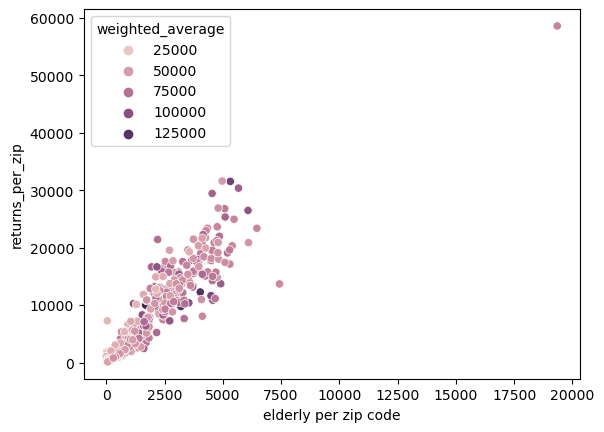

In [167]:
sns.scatterplot(x='elderly per zip code', y='returns_per_zip', data=elderlydf, hue='weighted_average')#, size='weighted_average')

#### Step 5: calculations and aggregations 
- using the number of returns and the middle income of each band, calculate a weighted average income per zipcode in a new dataframe 
- add to this data frame the number of returns per zipcode
- add to this dataframe the aggregated number of dependents per zipcode 
- add to this dataframe the aggregated number of elderly per zipcode 

#### Step 6: validate the data
- use EDA techniques including visualisation to validate your calculations and aggregations from the previous step 